# PCA for dimensionality Reduction

There are multiple analyses I do at any given time that have multiple classes. And the only way to get to the 
root of the data is to visualize the different classes in light if only the interesting features.
In the below experiment I have performed PCA on a multiclass dataset. Using 9 raw elements, you can predict the type of glass. This was an interesting dataset as it was originally created for forensic testing. I got this dataset from UCI website: https://archive.ics.uci.edu/ml/datasets.html

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load data
X = pd.read_csv('glass.csv')

for i in range(1:4):
    headers=
X.columns = ['Id', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','label']

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 
11. Type of glass: (class attribute) 
-- 1 building_windows_float_processed 
-- 2 building_windows_non_float_processed 
-- 3 vehicle_windows_float_processed 
-- 4 vehicle_windows_non_float_processed (none in this database) 
-- 5 containers 
-- 6 tableware 
-- 7 headlamps

In [113]:
X_train = X.drop(['label','Id'], axis='columns', inplace=False)
y_train = X['label']

In [227]:
from sklearn.model_selection import train_test_split
X_train[:3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0


Below I perform PCA. At the bottom of this notebook, there are two plots: PCA with 1 dimention and PCA with 2 dimension. The idea was to visualize 7 classes distinctively in the data. (on a single axis and 2D axis)

In [222]:
#perform PCA on feature set.
pca = PCA(n_components=1, whiten='True') #n_components=1, 2
pcax = pca.fit(X_train).transform(X_train)
pca.explained_variance_

array([3.00652406])

In [223]:
#Train a Random Forest with PCA
train_X, test_X, train_Y, test_Y = train_test_split(pcax, y_train, test_size=0.30, random_state=4)
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(train_X,train_Y)
pred = rf.predict(test_X)

In [220]:
#Train a Random Forest without PCA
train_X, test_X, train_Y, test_Y = train_test_split(X_train, y_train, test_size=0.30, random_state=4)
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(train_X,train_Y)
pred = rf.predict(test_X)

In [224]:
#Cross calidation score. A Randomforest with 1 or 2 features is almost as accurate as Random forest with 9 features.
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, test_X, test_Y))

[0.625      0.57142857 0.78947368]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


I have used seaborn liobrary for the plotting. 
Below is a decent seperation of the 7 types of glasses on a 1D axis.

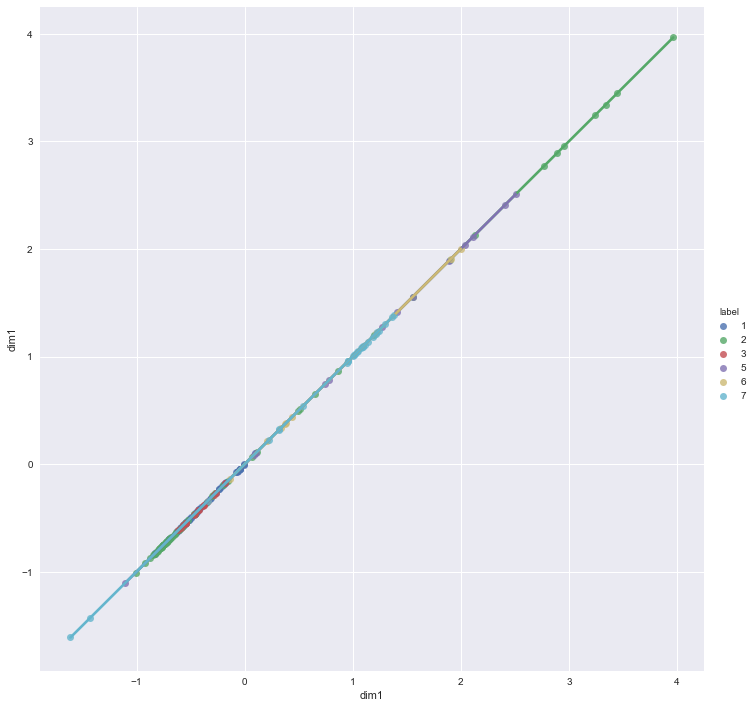

In [226]:
#PCA with 1D
import seaborn as sns
sns.set()
pcaxdf=pd.DataFrame(pcax)
pcaxdf['label']=y_train
pcaxdf.columns=['dim1','label']

g = sns.lmplot(x="dim1", y="dim1", hue="label",
               truncate=True, size=10, data=pcaxdf)


In [ ]:
Below is a decent representation of the 7 types of glasses on a 2D axis.

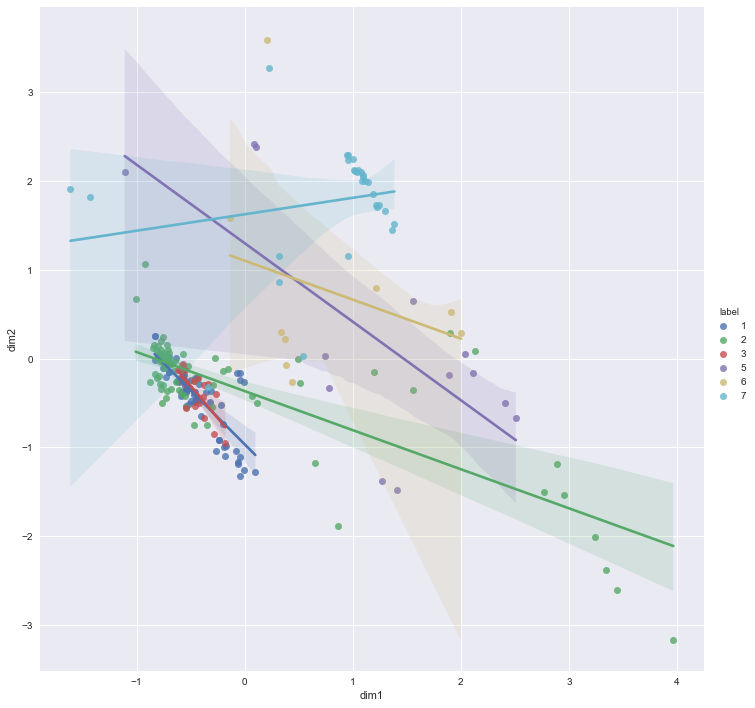

In [219]:
#PCA with 2D
import seaborn as sns
sns.set()
pcaxdf=pd.DataFrame(pcax)
pcaxdf['label']=y_train
pcaxdf.columns=['dim1','dim2','label']

g = sns.lmplot(x="dim1", y="dim2", hue="label",
               truncate=True, size=10, data=pcaxdf)
